# Find oredered-samples based on real-valued variables in the Metadata

__Import dependencies and load data__

Set up R magic

In [1]:
%load_ext rpy2.ipython

In [2]:
%%bash
wget https://cran.r-project.org/src/contrib/rjson_0.2.20.tar.gz

--2019-03-13 18:27:59--  https://cran.r-project.org/src/contrib/rjson_0.2.20.tar.gz
Resolving cran.r-project.org (cran.r-project.org)... 137.208.57.37
Connecting to cran.r-project.org (cran.r-project.org)|137.208.57.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99600 (97K) [application/x-gzip]
Saving to: ‘rjson_0.2.20.tar.gz.7’

     0K .......... .......... .......... .......... .......... 51% 67.9K 1s
    50K .......... .......... .......... .......... .......   100%  127K=1.1s

2019-03-13 18:28:01 (87.8 KB/s) - ‘rjson_0.2.20.tar.gz.7’ saved [99600/99600]



In [3]:
%%bash
R CMD INSTALL rjson_0.2.20.tar.gz

x86_64-conda_cos6-linux-gnu-c++  -I"/opt/conda/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -I/opt/conda/include -Wl,-rpath-link,/opt/conda/lib   -fpic  -fvisibility-inlines-hidden  -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -pipe -I/opt/conda/include -fdebug-prefix-map==/usr/local/src/conda/- -fdebug-prefix-map==/usr/local/src/conda-prefix  -c dump.cpp -o dump.o
x86_64-conda_cos6-linux-gnu-cc -I"/opt/conda/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -I/opt/conda/include -Wl,-rpath-link,/opt/conda/lib   -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -pipe -I/opt/conda/include -fdebug-prefix-map==/usr/local/src/conda/- -fdebug-prefix-map==/usr/local/src/conda-prefix  -c parser.c -o parser.o
x86_64-conda_cos6-linux-gnu-cc -I"/opt/conda/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -I/opt/conda/include -Wl,-rpath-link,/opt/conda/lib 

* installing to library ‘/opt/conda/lib/R/library’
* installing *source* package ‘rjson’ ...
** package ‘rjson’ successfully unpacked and MD5 sums checked
** libs
installing to /opt/conda/lib/R/library/rjson/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded
* DONE (rjson)


In [4]:
%%R
library(rjson)

In [5]:
import json
import pandas as pd
from functions import *

experiment_to_terms_f_json = './data/experiment_to_terms.json'
term_name_to_id_f = './data/term_name_to_id.json'
experiments_in_hackathon_data_f = './data/experiments_in_hackathon_data.json'
experiment_to_type_f = './data/experiment_to_type.json'
experiment_to_study_f = './data/experiment_to_study.json'
experiment_to_real_value_terms_f = './data/experiment_to_real_value_terms.json'
experiment_to_runs_f = './data/experiment_to_runs.json'

In [6]:
%%R
metadata_file_tsv <- read.table(file = "./data/experiment_to_terms.tsv", header = FALSE, sep = "\t")

In [7]:
with open(experiment_to_terms_f_json, 'r') as f:
    sample_to_terms = json.load(f)    
with open(term_name_to_id_f, 'r') as f:
    term_name_to_id = json.load(f)
with open(experiments_in_hackathon_data_f, 'r') as f:
    available = set(json.load(f))
with open(experiment_to_type_f, 'r') as f:
    sample_to_type = json.load(f)
with open(experiment_to_study_f, 'r') as f:
    sample_to_study = json.load(f)
with open(experiment_to_real_value_terms_f, 'r') as f:
    sample_to_real_val = json.load(f)
with open(experiment_to_runs_f, 'r') as f:
    sample_to_runs = json.load(f)

__1. Enter your query__  

Enter your target term in place of `'blood'`, your target property in place of `'age'`, and your target unit in place of `None`.

(Note: most samples in the SRA do not have unit information. We advise leaving this as `None` for properties in which the unit is implied (e.g. age is usually expressed in years).

In [8]:
term = 'blood' ## <-- INPUT HERE
target_property = 'age' ## <-- INPUT HERE
target_unit = None ## <-- INPUT HERE

__2. List terms below to remove__  
In the example below, `'disease', 'disease of cellular proliferation'` will be removed from all timepoints

In [9]:
blacklist_terms = set([
    'disease', 
    'disease of cellular proliferation'
]) ## <-- INPUT HERE

__3. Search for ordered samples__

In [10]:
val_to_samples, primary_df = series(term, target_property, sample_to_real_val, sample_to_terms,             
        sample_to_type, sample_to_study, term_name_to_id, blacklist_terms, 
        filter_poor=False, filter_cell_line=True, filter_differentiated=True,
        value_limit=100, target_unit=None)

These are time points that were found:

In [11]:
df = pd.DataFrame(data=[(k,len(v)) for k,v in val_to_samples.items()], columns=[target_property, 'Number of samples'])
df.sort_values(target_property)

,age,Number of samples
17,0,28
19,1,15
2,2,219
18,3,14
73,5,1
78,7,1
0,8,94
23,9,6
16,10,33
35,11,18


__4. Browse other metadata terms that are associated with samples in a given time point__

Enter whether you want to view cases or controls. Assign the following variable to the number corresponding to the timepoint you would like to view:

In [12]:
view_value = 1 ## <-- INPUT HERE

if view_value in val_to_samples:
    samples = list(val_to_samples[view_value])
with open('./data/term-in.json', 'w') as f:
    json.dump(samples, f)

The following plots the proportion of metadata terms for those terms that appear in at least 10% of the samples in the current subset:

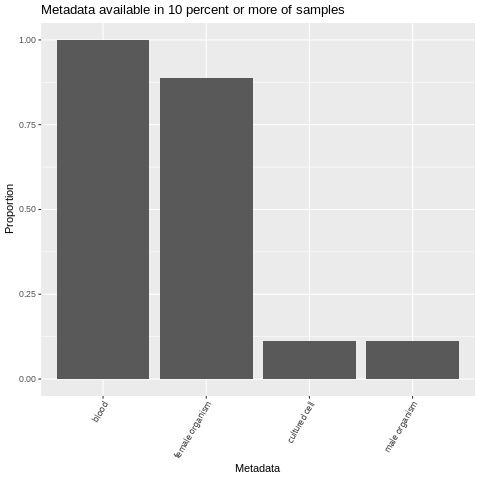

In [13]:
%%R
source("./Metadata_plot.R")
bp

__5. Produce output file__. 

Enter the filename for which you would like to output these samples:

In [14]:
output_file = 'series_data.csv' ## <- OUTPUT FILE HERE

primary_df.to_csv(output_file)